In [2]:
import warnings
warnings.filterwarnings(action='ignore')

**데이터 수집**

In [3]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(Path("winequalityN.csv"))

df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df["volatile acidity"].value_counts()

volatile acidity
0.280    286
0.240    265
0.260    255
0.250    238
0.220    235
        ... 
0.975      1
1.070      1
0.950      1
1.090      1
0.905      1
Name: count, Length: 187, dtype: int64

In [6]:
df.columns = df.columns.str.replace(" ", "_")

df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
df.quality.describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [8]:
sorted(df.quality.unique())

[3, 4, 5, 6, 7, 8, 9]

In [9]:
df.quality.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [10]:
# nan 값 처리
df.isna().sum()

type                     0
fixed_acidity           10
volatile_acidity         8
citric_acid              3
residual_sugar           2
chlorides                2
free_sulfur_dioxide      0
total_sulfur_dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [11]:
df[df.isna().any(axis=1)]

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
17,white,NaN,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
33,white,6.2,0.120,0.34,NaN,0.045,43.0,117.0,0.99390,3.42,0.51,9.0,6
54,white,6.8,0.200,0.59,0.9,0.147,38.0,132.0,0.99300,NaN,0.38,9.1,6
86,white,7.2,NaN,0.63,11.0,0.044,55.0,156.0,0.99740,3.09,0.44,8.7,6
98,white,9.8,0.360,0.46,10.5,NaN,4.0,83.0,0.99560,2.89,0.30,10.1,4
139,white,8.1,0.280,0.39,1.9,0.029,18.0,79.0,0.99230,NaN,0.52,11.8,6
174,white,NaN,0.270,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,5
224,white,6.3,0.495,0.22,1.8,0.046,31.0,140.0,0.99290,3.39,NaN,10.4,6
249,white,NaN,0.410,0.14,10.4,0.037,18.0,119.0,0.99600,3.38,0.45,10.0,5
267,white,NaN,0.580,0.07,6.9,0.043,34.0,149.0,0.99440,3.34,0.57,9.7,5


In [12]:
df = df.dropna(axis='rows')

In [13]:
df.isna().sum()

type                    0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
wine = df

In [15]:
wine.groupby("type")['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1593.0,5.636535,0.807687,3.0,5.0,6.0,6.0,8.0
white,4870.0,5.878029,0.885699,3.0,5.0,6.0,6.0,9.0


In [16]:
IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

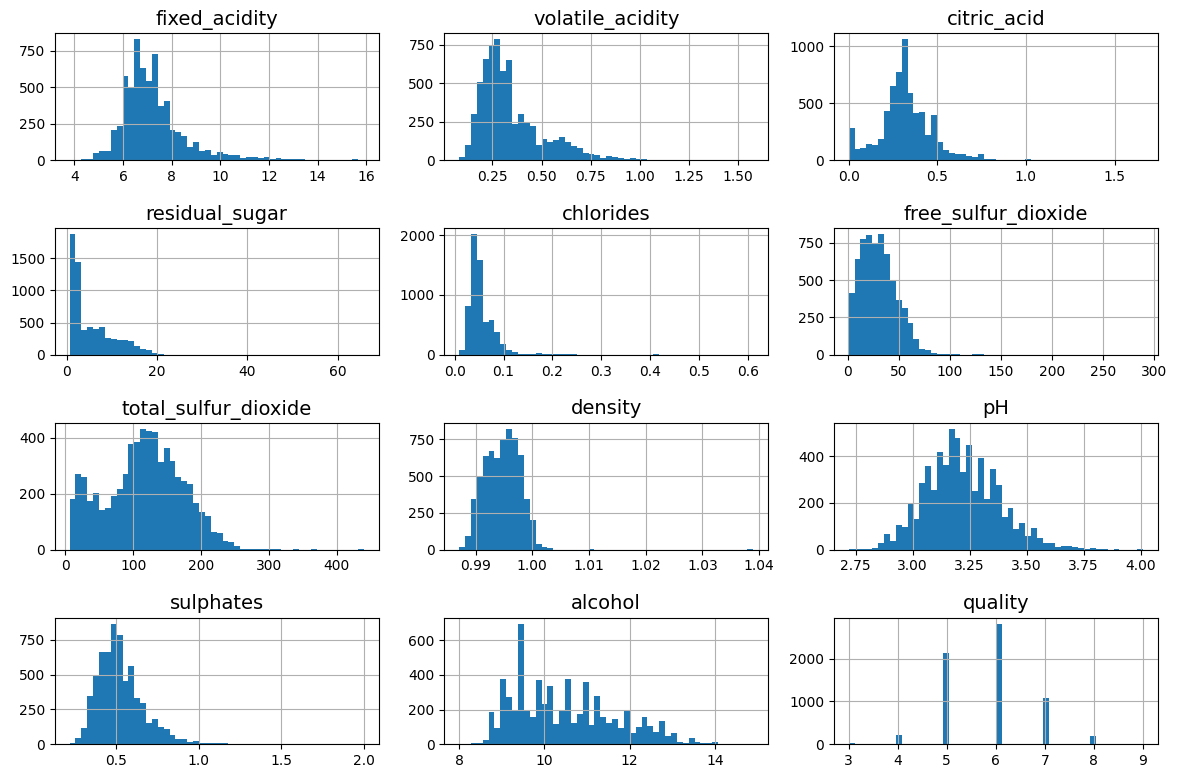

In [17]:
# 구조들 훓터보기
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

wine.hist(bins=50, figsize=(12, 8))
save_fig("wine_histogram_plots") 
plt.show()

**데이터세트 만들기**

In [18]:
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [19]:
train_set, test_set = shuffle_and_split_data(wine, 0.2)
len(train_set)

5171

In [20]:
np.random.seed(42)

In [21]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(wine, test_size=0.2, random_state=1)

In [22]:
wine["fixed_acidity_cat"] = pd.cut(wine["fixed_acidity"],
                               bins=[0., 5.5, 6, 7, 8., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [23]:
wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,fixed_acidity_cat
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,3
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,3
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,5
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,4
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,4


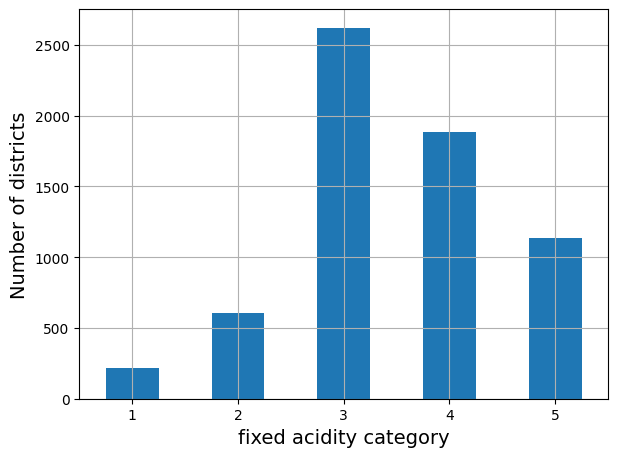

In [24]:
wine["fixed_acidity_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("fixed acidity category")
plt.ylabel("Number of districts")
save_fig("wine fixed acidity cat_bar_plot")  # extra code
plt.show()

In [25]:
strat_train_set, strat_test_set = train_test_split(
    wine, test_size=0.2, stratify=wine["fixed_acidity_cat"], random_state=42)

In [26]:
strat_train_set.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,fixed_acidity_cat
5954,red,8.9,0.48,0.53,4.0,0.101,3.0,10.0,0.99586,3.21,0.59,12.1,7,5
5683,red,9.9,0.35,0.41,2.3,0.083,11.0,61.0,0.99820,3.21,0.50,9.5,5,5
234,white,7.2,0.23,0.38,14.3,0.058,55.0,194.0,0.99790,3.09,0.44,9.0,6,4
4443,white,7.2,0.47,0.16,5.9,0.048,14.0,125.0,0.99428,3.09,0.49,9.8,5,4
4630,white,5.7,0.25,0.32,12.2,0.041,43.0,127.0,0.99524,3.23,0.53,10.4,7,2


In [27]:
strat_test_set["fixed_acidity_cat"].value_counts() / len(strat_test_set)

fixed_acidity_cat
3    0.405259
4    0.291570
5    0.175561
2    0.093581
1    0.034029
Name: count, dtype: float64

In [28]:
# 계층  샘플링과 순수한 무작위 샘플링의 편향 비교 
def income_cat_proportions(data):
    return data["fixed_acidity_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(wine, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(wine),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "fixed acidity Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
fixed acidity Category,,,,,
1,3.37,3.40,3.40,0.89,0.89
2,9.39,9.36,8.43,-0.36,-10.24
3,40.57,40.53,41.69,-0.11,2.75
4,29.14,29.16,28.07,0.08,-3.64
5,17.53,17.56,18.41,0.15,5.00


In [29]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("fixed_acidity_cat", axis=1, inplace=True)
    
df1 = strat_train_set.copy()

In [30]:
df1.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
5954,red,8.9,0.48,0.53,4.0,0.101,3.0,10.0,0.99586,3.21,0.59,12.1,7
5683,red,9.9,0.35,0.41,2.3,0.083,11.0,61.0,0.99820,3.21,0.50,9.5,5
234,white,7.2,0.23,0.38,14.3,0.058,55.0,194.0,0.99790,3.09,0.44,9.0,6
4443,white,7.2,0.47,0.16,5.9,0.048,14.0,125.0,0.99428,3.09,0.49,9.8,5
4630,white,5.7,0.25,0.32,12.2,0.041,43.0,127.0,0.99524,3.23,0.53,10.4,7


**데이터시각화**

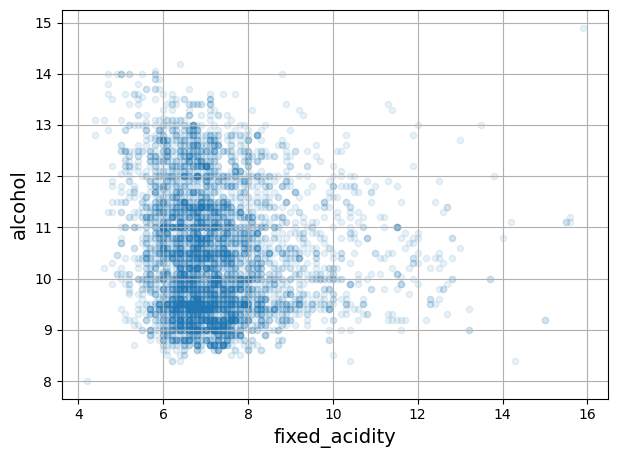

In [31]:
df1.plot(kind="scatter", x="fixed_acidity", y="alcohol", grid=True, alpha=0.1)
save_fig("bad_visualization_plot")  # 그림 저장
plt.show()

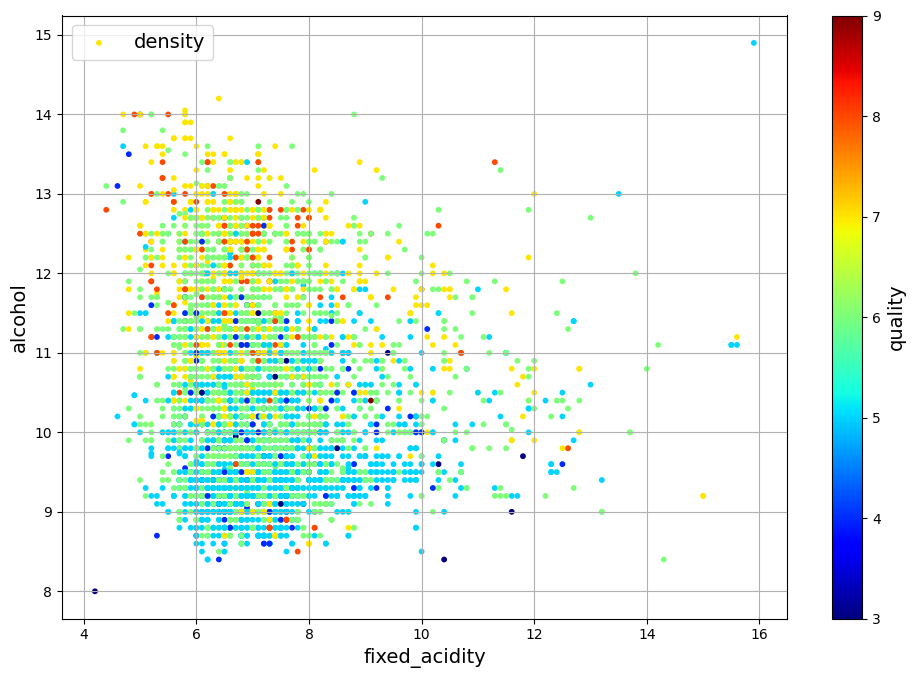

In [32]:
df1.plot(kind="scatter", x="fixed_acidity", y="alcohol", grid=True,
             s=df1["density"] * 10, label="density", # 밀도
             c="quality", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
save_fig("quality_scatterplot") 
plt.show()

**상관 관계와 상관 계수**

In [33]:
corr_matrix = df1.drop(columns=['type']).corr()

In [34]:
corr_matrix

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.223747,0.325814,-0.112112,0.296694,-0.275590,-0.329218,0.462782,-0.250355,0.299248,-0.092804,-0.076018
volatile_acidity,0.223747,1.000000,-0.367752,-0.200342,0.382817,-0.347333,-0.402842,0.269520,0.246014,0.224877,-0.045798,-0.260629
citric_acid,0.325814,-0.367752,1.000000,0.148005,0.041575,0.135342,0.186352,0.104184,-0.323534,0.059189,-0.015011,0.080734
residual_sugar,-0.112112,-0.200342,0.148005,1.000000,-0.128911,0.412324,0.499498,0.546629,-0.270372,-0.190413,-0.370307,-0.048359
chlorides,0.296694,0.382817,0.041575,-0.128911,1.000000,-0.196169,-0.275245,0.364354,0.043802,0.397021,-0.259224,-0.200484
free_sulfur_dioxide,-0.275590,-0.347333,0.135342,0.412324,-0.196169,1.000000,0.729184,0.037305,-0.154744,-0.190407,-0.189179,0.038540
total_sulfur_dioxide,-0.329218,-0.402842,0.186352,0.499498,-0.275245,0.729184,1.000000,0.040453,-0.234778,-0.269907,-0.269848,-0.052843
density,0.462782,0.269520,0.104184,0.546629,0.364354,0.037305,0.040453,1.000000,0.009814,0.258607,-0.704057,-0.312011
pH,-0.250355,0.246014,-0.323534,-0.270372,0.043802,-0.154744,-0.234778,0.009814,1.000000,0.192530,0.116165,0.028644
sulphates,0.299248,0.224877,0.059189,-0.190413,0.397021,-0.190407,-0.269907,0.258607,0.192530,1.000000,-0.009649,0.044256


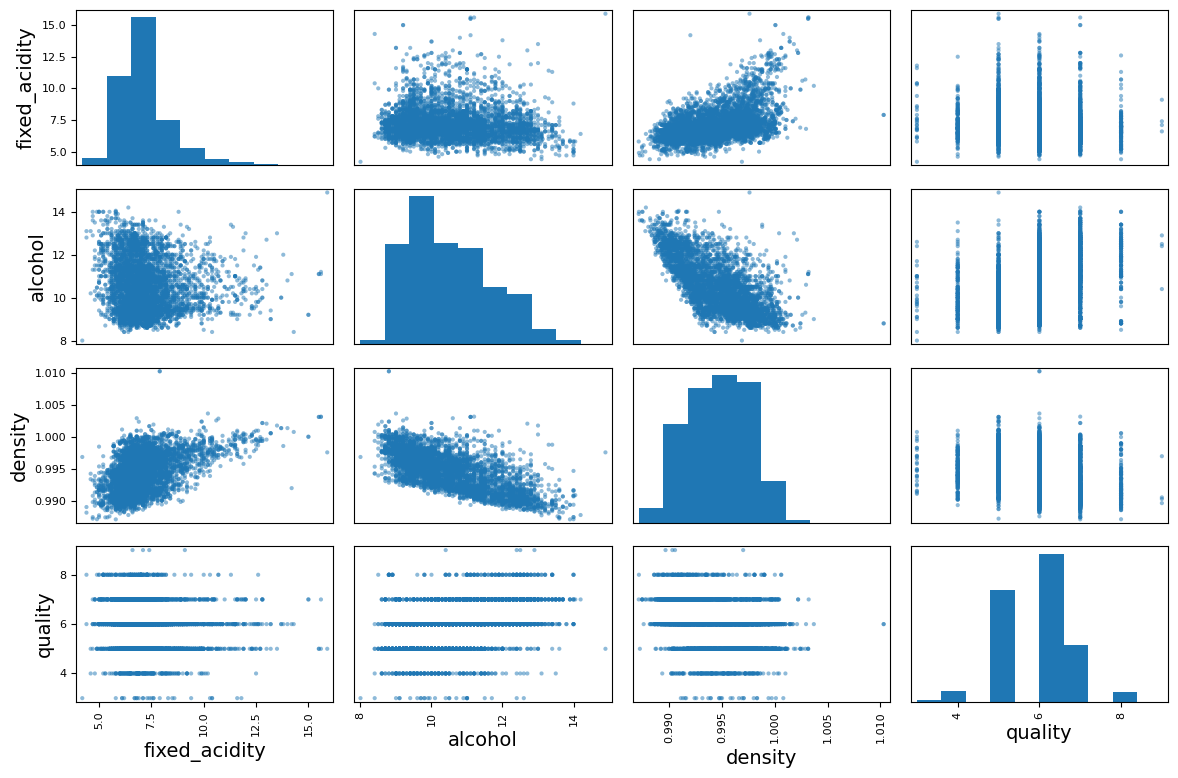

In [35]:
from pandas.plotting import scatter_matrix
attributes = ["fixed_acidity", "alcohol", "density",
              "quality"]
scatter_matrix(df1[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

In [36]:
df1['quality'].unique()

array([7, 5, 6, 4, 8, 9, 3], dtype=int64)

In [37]:
df1.quality.value_counts().sort_index()

quality
3      27
4     170
5    1700
6    2252
7     870
8     147
9       4
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

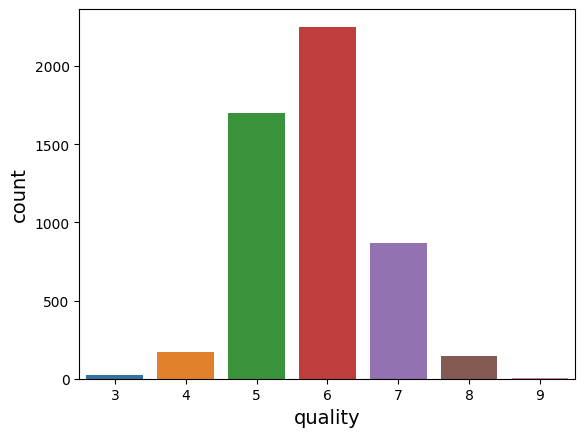

In [38]:
sns.countplot(x='quality', data=df1)

In [39]:
conditions = [
    (df1['quality'] >= 7),
    (df1['quality'] <= 4)
]
rating = ['good', 'bad']
df1['rating'] = np.select(conditions, rating, default='average')
df1.rating.value_counts()

rating
average    3952
good       1021
bad         197
Name: count, dtype: int64

In [40]:
df1.drop(columns=['type'])  

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,rating
5954,8.9,0.48,0.53,4.0,0.101,3.0,10.0,0.99586,3.21,0.59,12.1,7,good
5683,9.9,0.35,0.41,2.3,0.083,11.0,61.0,0.99820,3.21,0.50,9.5,5,average
234,7.2,0.23,0.38,14.3,0.058,55.0,194.0,0.99790,3.09,0.44,9.0,6,average
4443,7.2,0.47,0.16,5.9,0.048,14.0,125.0,0.99428,3.09,0.49,9.8,5,average
4630,5.7,0.25,0.32,12.2,0.041,43.0,127.0,0.99524,3.23,0.53,10.4,7,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904,7.9,0.26,0.33,10.3,0.039,73.0,212.0,0.99690,2.93,0.49,9.5,6,average
5867,6.7,0.56,0.09,2.9,0.079,7.0,22.0,0.99669,3.46,0.61,10.2,5,average
5511,8.2,0.39,0.38,1.5,0.058,10.0,29.0,0.99620,3.26,0.74,9.8,5,average
3548,6.2,0.47,0.19,8.3,0.029,24.0,142.0,0.99200,3.22,0.45,12.3,6,average


In [41]:
corr_matrix["fixed_acidity"].sort_values(ascending=False)

fixed_acidity           1.000000
density                 0.462782
citric_acid             0.325814
sulphates               0.299248
chlorides               0.296694
volatile_acidity        0.223747
quality                -0.076018
alcohol                -0.092804
residual_sugar         -0.112112
pH                     -0.250355
free_sulfur_dioxide    -0.275590
total_sulfur_dioxide   -0.329218
Name: fixed_acidity, dtype: float64

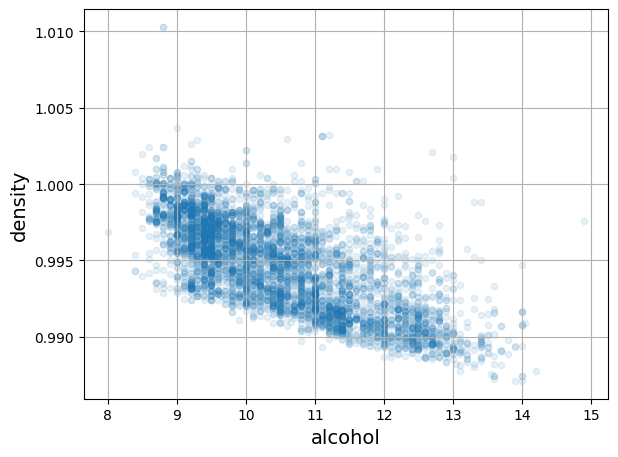

In [42]:
df1.plot(kind="scatter", x="alcohol", y="density",
             alpha=0.1, grid=True)
save_fig("alcohol_vs_fixed acidity_scatterplot")  # extra code
plt.show()

In [43]:

corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.446432
citric_acid             0.080734
sulphates               0.044256
free_sulfur_dioxide     0.038540
pH                      0.028644
residual_sugar         -0.048359
total_sulfur_dioxide   -0.052843
fixed_acidity          -0.076018
chlorides              -0.200484
volatile_acidity       -0.260629
density                -0.312011
Name: quality, dtype: float64

**4 데이터 정제**


In [44]:
wine = strat_train_set.drop("free_sulfur_dioxide", axis=1)
wine_labels = strat_train_set['free_sulfur_dioxide'].copy()
wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
5954,red,8.9,0.48,0.53,4.0,0.101,10.0,0.99586,3.21,0.59,12.1,7
5683,red,9.9,0.35,0.41,2.3,0.083,61.0,0.99820,3.21,0.50,9.5,5
234,white,7.2,0.23,0.38,14.3,0.058,194.0,0.99790,3.09,0.44,9.0,6
4443,white,7.2,0.47,0.16,5.9,0.048,125.0,0.99428,3.09,0.49,9.8,5
4630,white,5.7,0.25,0.32,12.2,0.041,127.0,0.99524,3.23,0.53,10.4,7


In [45]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [46]:
wine_num = wine.select_dtypes(include=[np.number])

In [47]:
wine_num

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
5954,8.9,0.48,0.53,4.0,0.101,10.0,0.99586,3.21,0.59,12.1,7
5683,9.9,0.35,0.41,2.3,0.083,61.0,0.99820,3.21,0.50,9.5,5
234,7.2,0.23,0.38,14.3,0.058,194.0,0.99790,3.09,0.44,9.0,6
4443,7.2,0.47,0.16,5.9,0.048,125.0,0.99428,3.09,0.49,9.8,5
4630,5.7,0.25,0.32,12.2,0.041,127.0,0.99524,3.23,0.53,10.4,7
...,...,...,...,...,...,...,...,...,...,...,...
1904,7.9,0.26,0.33,10.3,0.039,212.0,0.99690,2.93,0.49,9.5,6
5867,6.7,0.56,0.09,2.9,0.079,22.0,0.99669,3.46,0.61,10.2,5
5511,8.2,0.39,0.38,1.5,0.058,29.0,0.99620,3.26,0.74,9.8,5
3548,6.2,0.47,0.19,8.3,0.029,142.0,0.99200,3.22,0.45,12.3,6


In [48]:
wine_num.replace([np.inf, -np.inf], np.nan, inplace=True)
imputer.fit(wine_num)

SimpleImputer(strategy='median')

In [49]:
imputer.statistics_

array([7.0000e+00, 2.9000e-01, 3.1000e-01, 3.0000e+00, 4.7000e-02,
       1.1900e+02, 9.9488e-01, 3.2000e+00, 5.1000e-01, 1.0300e+01,
       6.0000e+00])

In [50]:
wine_num.median().values

array([7.0000e+00, 2.9000e-01, 3.1000e-01, 3.0000e+00, 4.7000e-02,
       1.1900e+02, 9.9488e-01, 3.2000e+00, 5.1000e-01, 1.0300e+01,
       6.0000e+00])

In [51]:
X = imputer.transform(wine_num)

In [52]:
imputer.feature_names_in_

array(['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'], dtype=object)

In [53]:
wine_tr = pd.DataFrame(X, columns=wine_num.columns,
                          index=wine_num.index)

In [54]:
wine_tr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
5954,8.9,0.48,0.53,4.0,0.101,10.0,0.99586,3.21,0.59,12.1,7.0
5683,9.9,0.35,0.41,2.3,0.083,61.0,0.99820,3.21,0.50,9.5,5.0
234,7.2,0.23,0.38,14.3,0.058,194.0,0.99790,3.09,0.44,9.0,6.0
4443,7.2,0.47,0.16,5.9,0.048,125.0,0.99428,3.09,0.49,9.8,5.0
4630,5.7,0.25,0.32,12.2,0.041,127.0,0.99524,3.23,0.53,10.4,7.0
...,...,...,...,...,...,...,...,...,...,...,...
1904,7.9,0.26,0.33,10.3,0.039,212.0,0.99690,2.93,0.49,9.5,6.0
5867,6.7,0.56,0.09,2.9,0.079,22.0,0.99669,3.46,0.61,10.2,5.0
5511,8.2,0.39,0.38,1.5,0.058,29.0,0.99620,3.26,0.74,9.8,5.0
3548,6.2,0.47,0.19,8.3,0.029,142.0,0.99200,3.22,0.45,12.3,6.0


In [55]:
imputer.strategy

'median'

In [56]:
wine_tr = pd.DataFrame(X, columns=wine_num.columns,
                          index=wine_num.index)

In [57]:
null_rows = df.isna().any(axis=1)
null_rows_idx = df.index[null_rows].tolist()

**텍스트와 범주형 특성**

In [58]:
wine_cat = df1[["type"]]
wine_cat.head()

,type
5954,red
5683,red
234,white
4443,white
4630,white


In [59]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
wine_cat_encoded = ordinal_encoder.fit_transform(wine_cat)

In [60]:
wine_cat_encoded[:8]

array([[0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [61]:
ordinal_encoder.categories_

[array(['red', 'white'], dtype=object)]

In [62]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
wine_cat_1hot = cat_encoder.fit_transform(wine_cat)

In [63]:
wine_cat_1hot

<5170x2 sparse matrix of type '<class 'numpy.float64'>'
	with 5170 stored elements in Compressed Sparse Row format>

In [64]:
wine_cat_1hot.toarray()

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [65]:
cat_encoder = OneHotEncoder(sparse=False)
wine_cat_1hot = cat_encoder.fit_transform(wine_cat)
wine_cat_1hot

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [66]:
cat_encoder.categories_

[array(['red', 'white'], dtype=object)]

In [67]:
df_test = pd.DataFrame({"type": ["red", "white"]})
df_test

,type
0,red
1,white


In [68]:
pd.get_dummies(df_test)

,type_red,type_white
0,True,False
1,False,True


In [69]:
cat_encoder.transform(df_test)

array([[1., 0.],
       [0., 1.]])

In [70]:
df_test_unknown = pd.DataFrame({"type": ["red", "white"]})
pd.get_dummies(df_test_unknown)

,type_red,type_white
0,True,False
1,False,True


In [71]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

array([[1., 0.],
       [0., 1.]])

In [72]:
cat_encoder.feature_names_in_

array(['type'], dtype=object)

In [73]:
cat_encoder.get_feature_names_out()

array(['type_red', 'type_white'], dtype=object)

In [74]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)

In [75]:
df_output

,type_red,type_white
0,1.0,0.0
1,0.0,1.0


**특성 스케일링(Feature Scaling)**

In [76]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(wine_num)

In [77]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(wine_num)

In [78]:
wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
5954,red,8.9,0.48,0.53,4.0,0.101,10.0,0.99586,3.21,0.59,12.1,7
5683,red,9.9,0.35,0.41,2.3,0.083,61.0,0.99820,3.21,0.50,9.5,5
234,white,7.2,0.23,0.38,14.3,0.058,194.0,0.99790,3.09,0.44,9.0,6
4443,white,7.2,0.47,0.16,5.9,0.048,125.0,0.99428,3.09,0.49,9.8,5
4630,white,5.7,0.25,0.32,12.2,0.041,127.0,0.99524,3.23,0.53,10.4,7


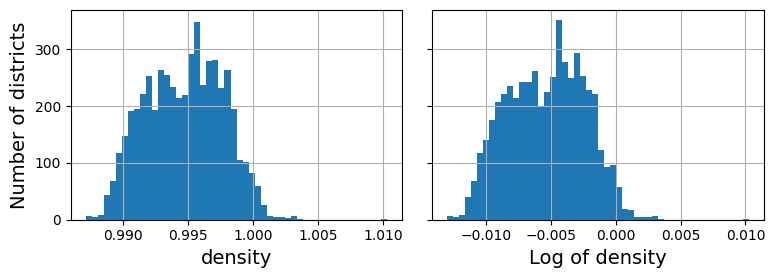

In [79]:
# extra code – this cell generates Figure 2–17
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
wine["density"].hist(ax=axs[0], bins=50)
wine["density"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("density")
axs[1].set_xlabel("Log of density")
axs[0].set_ylabel("Number of districts")
save_fig("long_tail_plot")
plt.show()

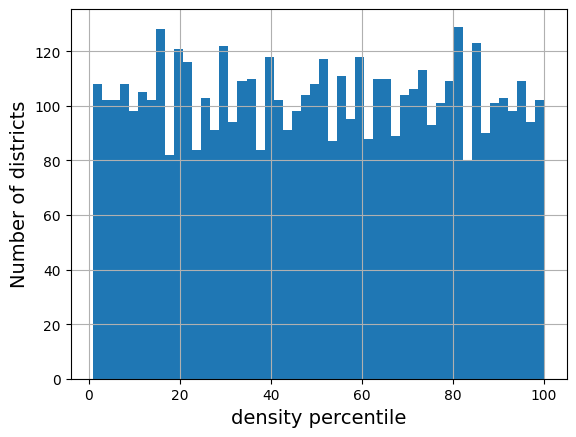

In [80]:
# extra code – just shows that we get a uniform distribution
percentiles = [np.percentile(wine["density"], p)
               for p in range(1, 100)]
flattened_median_income = pd.cut(wine["density"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
flattened_median_income.hist(bins=50)
plt.xlabel("density percentile")
plt.ylabel("Number of districts")
plt.show()
# Note: incomes below the 1st percentile are labeled 1, and incomes above the
# 99th percentile are labeled 100. This is why the distribution below ranges
# from 1 to 100 (not 0 to 100).

In [81]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(wine[["density"]], [[35]], gamma=0.1)

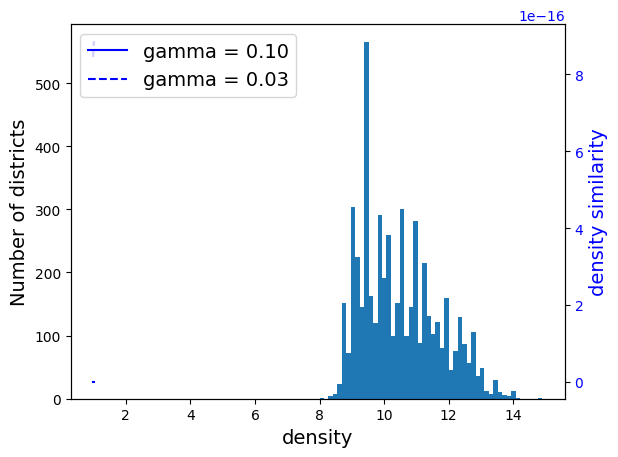

In [82]:
# extra code – this cell generates Figure 2–18

ages = np.linspace(wine["density"].min(),
                   wine["density"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("density")
ax1.set_ylabel("Number of districts")
ax1.hist(wine["alcohol"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("density similarity", color=color)

plt.legend(loc="upper left")
save_fig("age_similarity_plot")
plt.show()

In [83]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(wine_labels.to_frame())

model = LinearRegression()
model.fit(wine[["density"]], scaled_labels)
some_new_data = wine[["density"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [84]:
some_new_data

,density
5954,0.99586
5683,0.99820
234,0.99790
4443,0.99428
4630,0.99524


In [85]:
predictions

array([[30.99739262],
       [31.52533365],
       [31.4576489 ],
       [30.64091961],
       [30.8575108 ]])

In [86]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(wine[["density"]], wine_labels)
predictions = model.predict(some_new_data)

In [87]:
predictions

array([30.99739262, 31.52533365, 31.4576489 , 30.64091961, 30.8575108 ])

**4. 사용자 정의 변환기**

In [88]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(wine[["density"]])

In [89]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(wine[["density"]])

In [90]:
age_simil_35

array([[6.07198779e-51],
       [6.16938661e-51],
       [6.15681317e-51],
       ...,
       [6.08604411e-51],
       [5.91465602e-51],
       [6.23687801e-51]])

In [91]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(wine[["alcohol", "density"]])

In [92]:
sf_simil

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [93]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

In [94]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted


class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [95]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [96]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(wine[["alcohol", "density"]],
                                           sample_weight=wine_labels)

In [97]:
similarities[:3].round(2)

array([[0.  , 1.  , 0.08, 0.  , 0.32, 0.7 , 0.01, 0.76, 0.  , 0.15],
       [1.  , 0.  , 0.37, 0.59, 0.09, 0.  , 0.78, 0.01, 0.88, 0.  ],
       [0.77, 0.  , 0.11, 0.95, 0.02, 0.  , 0.37, 0.  , 0.98, 0.  ]])

In [98]:
wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
5954,red,8.9,0.48,0.53,4.0,0.101,10.0,0.99586,3.21,0.59,12.1,7
5683,red,9.9,0.35,0.41,2.3,0.083,61.0,0.99820,3.21,0.50,9.5,5
234,white,7.2,0.23,0.38,14.3,0.058,194.0,0.99790,3.09,0.44,9.0,6
4443,white,7.2,0.47,0.16,5.9,0.048,125.0,0.99428,3.09,0.49,9.8,5
4630,white,5.7,0.25,0.32,12.2,0.041,127.0,0.99524,3.23,0.53,10.4,7


In [99]:
wine.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1239.0,5.648910,0.816963,3.0,5.0,6.0,6.0,8.0
white,3931.0,5.870262,0.884102,3.0,5.0,6.0,6.0,9.0


In [100]:
wine.groupby('type')['quality'].quantile([0.25, 0.5, 0.75]).unstack('type')

type,red,white
0.25,5.0,5.0
0.50,6.0,6.0
0.75,6.0,6.0


**8. 변환 파이프라인**

In [101]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

In [102]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

from sklearn import set_config

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [103]:
wine_num_prepared = num_pipeline.fit_transform(wine_num)
wine_num_prepared[:2].round(2)

array([[ 1.3 ,  0.87,  1.47, -0.31,  1.27, -1.88,  0.4 , -0.05,  0.39,
         1.35,  1.35],
       [ 2.07,  0.08,  0.63, -0.67,  0.76, -0.98,  1.19, -0.05, -0.21,
        -0.83, -0.94]])

In [104]:
print(type(wine_num))
print(type(wine_num_prepared))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [105]:
df_wine_num_prepared = pd.DataFrame(
    wine_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=wine_num.index)

In [106]:
df_wine_num_prepared.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
5954,1.299757,0.873633,1.466844,-0.311442,1.272685,-1.880312,0.396238,-0.047628,0.394675,1.347265,1.354154
5683,2.071836,0.077828,0.627596,-0.671872,0.764341,-0.982083,1.187387,-0.047628,-0.208360,-0.828770,-0.935617
234,-0.012776,-0.656761,0.417784,1.872337,0.058307,1.360360,1.085957,-0.801794,-0.610383,-1.247238,0.209268
4443,-0.012776,0.812417,-1.120837,0.091391,-0.224106,0.145108,-0.137956,-0.801794,-0.275364,-0.577689,-0.935617
4630,-1.170894,-0.534329,-0.001840,1.427100,-0.421796,0.180332,0.186618,0.078067,-0.007348,-0.075527,1.354154


In [107]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [108]:
num_pipeline[:-1]

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

In [109]:
num_pipeline.named_steps["simpleimputer"]

SimpleImputer(strategy='median')

In [110]:
num_pipeline.set_params(simpleimputer__strategy="median")

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [111]:
X = wine.drop(['type'], axis=1)
y = wine['type']

In [112]:
# Pipeline을 통한 구현
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

# 진행할 동작 입력
estimators = [
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier())
]
# pipeline 입력
pipe = Pipeline(estimators)

In [113]:
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier())])

In [114]:
pipe.steps, pipe.steps[0], pipe.steps[1]

([('scaler', StandardScaler()), ('clf', DecisionTreeClassifier())],
 ('scaler', StandardScaler()),
 ('clf', DecisionTreeClassifier()))

In [115]:
pipe[0], pipe['scaler']

(StandardScaler(), StandardScaler())

In [116]:
pipe.set_params(clf__max_depth=2)
pipe.set_params(clf__random_state=13)
pipe[1], pipe['clf']

(DecisionTreeClassifier(max_depth=2, random_state=13),
 DecisionTreeClassifier(max_depth=2, random_state=13))

**9. 교차검증평가**

In [117]:
# Pipeline 구성
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [118]:
# 성과 측정
from sklearn.metrics import accuracy_score

y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print("Train Acc : {}".format(accuracy_score(y_train, y_pred_tr)))
print("Test Acc : {}".format(accuracy_score(y_test, y_pred_test)))

Train Acc : 0.9659090909090909
Test Acc : 0.9574468085106383


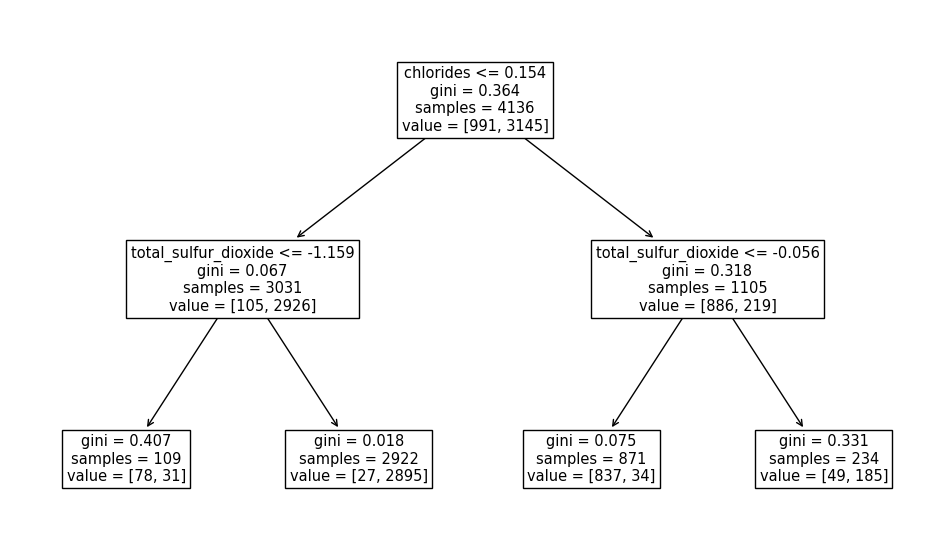

In [119]:
# 트리 확인
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 7))
plot_tree(pipe['clf'], feature_names = X_train.columns)
plt.show()

In [120]:
wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
5954,red,8.9,0.48,0.53,4.0,0.101,10.0,0.99586,3.21,0.59,12.1,7
5683,red,9.9,0.35,0.41,2.3,0.083,61.0,0.99820,3.21,0.50,9.5,5
234,white,7.2,0.23,0.38,14.3,0.058,194.0,0.99790,3.09,0.44,9.0,6
4443,white,7.2,0.47,0.16,5.9,0.048,125.0,0.99428,3.09,0.49,9.8,5
4630,white,5.7,0.25,0.32,12.2,0.041,127.0,0.99524,3.23,0.53,10.4,7


**10. 모델 세부튜닝**

In [121]:
# 데이터 정리
wine['value'] = [1 if each > 5 else 0 for each in wine['quality']]

#wine['color'] = if wine['type'] 

# wine['color'] = 

wine = wine.drop(columns='type')

X = wine.drop(['value' , 'quality'], axis=1)
y = wine['value']

print("Good Wine Class:",wine[wine['value'] == 1].shape)
print("Bad Wine Class:",wine[wine['value'] == 0].shape)

Good Wine Class: (3273, 12)
Bad Wine Class: (1897, 12)


Train Acc : 0.7369439071566731
Test Acc : 0.7379110251450677


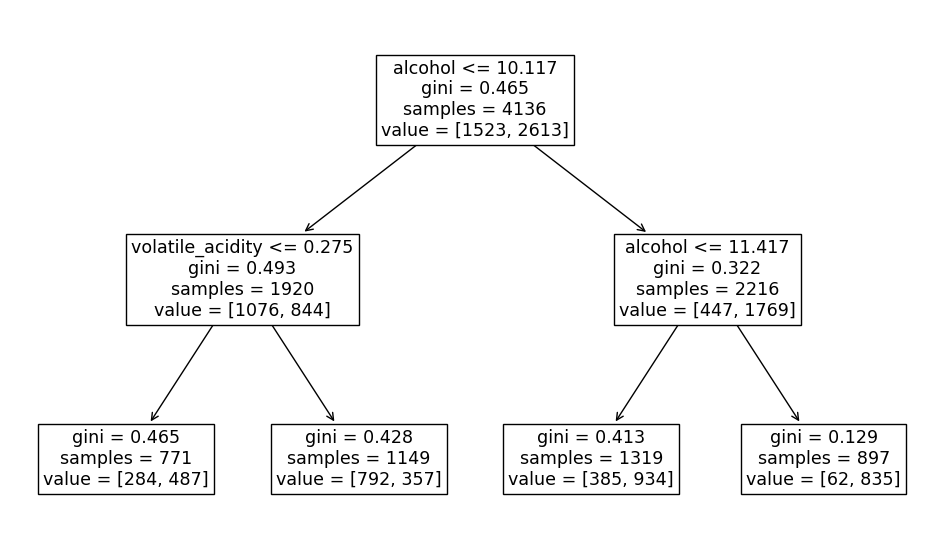

In [122]:
# DecisionTree로 분류
# 일반 데이터
# 최선인가? 라고 한다면 확신할 수 없다.
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc : {}'.format(accuracy_score(y_train, y_pred_tr)))
print('Test Acc : {}'.format(accuracy_score(y_test, y_pred_test)))

plt.figure(figsize=(12, 7))
plot_tree(wine_tree, feature_names = X_train.columns)
plt.show()

In [123]:
# DecisionTree로 분류
# 교차 검증 데이터
# KFold
# 대체적으로 5-Fold를 많이 쓴다.
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

kFold = KFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=13)

# 각각의 fold로 학습 후 acc
cv_accuracy = []
for train_idx, test_idx in kFold.split(X):
    # train, test 데이터 구분
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    # 해당 train, test로 학습
    wine_tree_cv.fit(X_train, y_train)
    # 성과(accuracy) 확인
    pred = wine_tree_cv.predict(X_test)
    cv_accuracy.append(accuracy_score(y_test, pred))
    
cv_accuracy

[0.7117988394584139,
 0.730174081237911,
 0.7330754352030948,
 0.7379110251450677,
 0.7408123791102514]

In [124]:
# acc의 분산이 크지않다면 평균을 대표값으로 한다.
np.mean(cv_accuracy), np.var(cv_accuracy), np.std(cv_accuracy)

(0.7307543520309479, 0.00010348349539262731, 0.010172683785148701)

In [125]:
# DecisionTree로 분류
# StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

skFold = StratifiedKFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=13)

# 각각의 fold로 학습 후 acc
cv_accuracy = []
for train_idx, test_idx in skFold.split(X, y):
    # train, test 데이터 구분
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    # 해당 train, test로 학습
    wine_tree_cv.fit(X_train, y_train)
    # 성과(accuracy) 확인
    pred = wine_tree_cv.predict(X_test)
    cv_accuracy.append(accuracy_score(y_test, pred))
    
cv_accuracy

[0.7117988394584139,
 0.7311411992263056,
 0.7446808510638298,
 0.7253384912959381,
 0.7379110251450677]

In [126]:
# acc의 분산이 크지않다면 평균을 대표값으로 한다.
np.mean(cv_accuracy), np.var(cv_accuracy), np.std(cv_accuracy)

(0.730174081237911, 0.00012645488591000724, 0.01124521613442833)



**교차검증평가**

In [127]:
from sklearn.model_selection import cross_val_score

skFold = StratifiedKFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=13)

cross_val_score(wine_tree_cv, X, y, scoring=None, cv=skFold)

array([0.71179884, 0.7311412 , 0.74468085, 0.72533849, 0.73791103])

In [128]:
def skfold_dt(depth):
    from sklearn.model_selection import cross_val_score

    skFold = StratifiedKFold(n_splits=5)
    wine_tree_cv = DecisionTreeClassifier(max_depth=depth, random_state=13)
    print(cross_val_score(wine_tree_cv, X, y, scoring=None, cv=skFold))

In [129]:
skfold_dt(3)


[0.69922631 0.7311412  0.74274662 0.72533849 0.73791103]


In [130]:
from sklearn.model_selection import cross_validate

skFold = StratifiedKFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=13)

cross_validate(wine_tree_cv, X, y, scoring=None, cv=skFold, return_train_score=True)

{'fit_time': array([0.00535369, 0.00499821, 0.00500321, 0.00500035, 0.00500011]),
 'score_time': array([0.00095677, 0.00100017, 0.0009973 , 0.00099945, 0.0010004 ]),
 'test_score': array([0.71179884, 0.7311412 , 0.74468085, 0.72533849, 0.73791103]),
 'train_score': array([0.7417795 , 0.73500967, 0.73525145, 0.74250484, 0.73694391])}

In [131]:
# GridSearchCV
# 결과를 확인하고 싶은 파라미터 정의
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'max_depth' : [2, 4, 7, 10]}
wine_tree = DecisionTreeClassifier(max_depth=2, random_state = 13)

# 분류기 지정, 측정할 파라미터 지정, cross validation
gridSearch = GridSearchCV(estimator=wine_tree, param_grid=params, cv=5)
# train, test는 gridSearch에서 해준다.
# n_jobs : CPU 코어를 보다 병렬로 활용한다. 따라서 높이면 속도가 빨라진다.
gridSearch.fit(X, y)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=13),
             param_grid={'max_depth': [2, 4, 7, 10]})

In [132]:
import pprint

pp = pprint.PrettyPrinter(indent = 4)
pp.pprint(gridSearch.cv_results_)

{   'mean_fit_time': array([0.00544562, 0.00919876, 0.01507144, 0.02202287]),
    'mean_score_time': array([0.00080261, 0.00095148, 0.00080109, 0.00080338]),
    'mean_test_score': array([0.73017408, 0.73249516, 0.744294  , 0.74158607]),
    'param_max_depth': masked_array(data=[2, 4, 7, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
    'params': [   {'max_depth': 2},
                  {'max_depth': 4},
                  {'max_depth': 7},
                  {'max_depth': 10}],
    'rank_test_score': array([4, 3, 1, 2]),
    'split0_test_score': array([0.71179884, 0.70599613, 0.73307544, 0.71566731]),
    'split1_test_score': array([0.7311412 , 0.73791103, 0.74564797, 0.72533849]),
    'split2_test_score': array([0.74468085, 0.75048356, 0.76499033, 0.76112186]),
    'split3_test_score': array([0.72533849, 0.72340426, 0.72727273, 0.73597679]),
    'split4_test_score': array([0.73791103, 0.74468085, 0.75048356, 0.76982592]),
    'std

In [133]:
# 최적의 성능을 가진 모델
print(gridSearch.best_estimator_)
# 최적일 경우의 값
print(gridSearch.best_score_)
# 최적일 경우의 parameters
print(gridSearch.best_params_)

DecisionTreeClassifier(max_depth=7, random_state=13)
0.744294003868472
{'max_depth': 7}


In [134]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
# Pipeline 설정
estimators = [
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier(random_state=13))
]

pipe = Pipeline(estimators)
# GridSearchCV 설정
# pipeline의 옵션을 수정하기위해 __ 사용
params = [ { 'clf__max_depth' : [2, 4, 7, 10] } ]
GridSearch = GridSearchCV(estimator = pipe, param_grid = params, cv = 5)
GridSearch.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        DecisionTreeClassifier(random_state=13))]),
             param_grid=[{'clf__max_depth': [2, 4, 7, 10]}])

In [135]:
# 최적 모델
print(GridSearch.best_estimator_)
print(GridSearch.best_score_)
print(GridSearch.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=7, random_state=13))])
0.7446808510638299
{'clf__max_depth': 7}


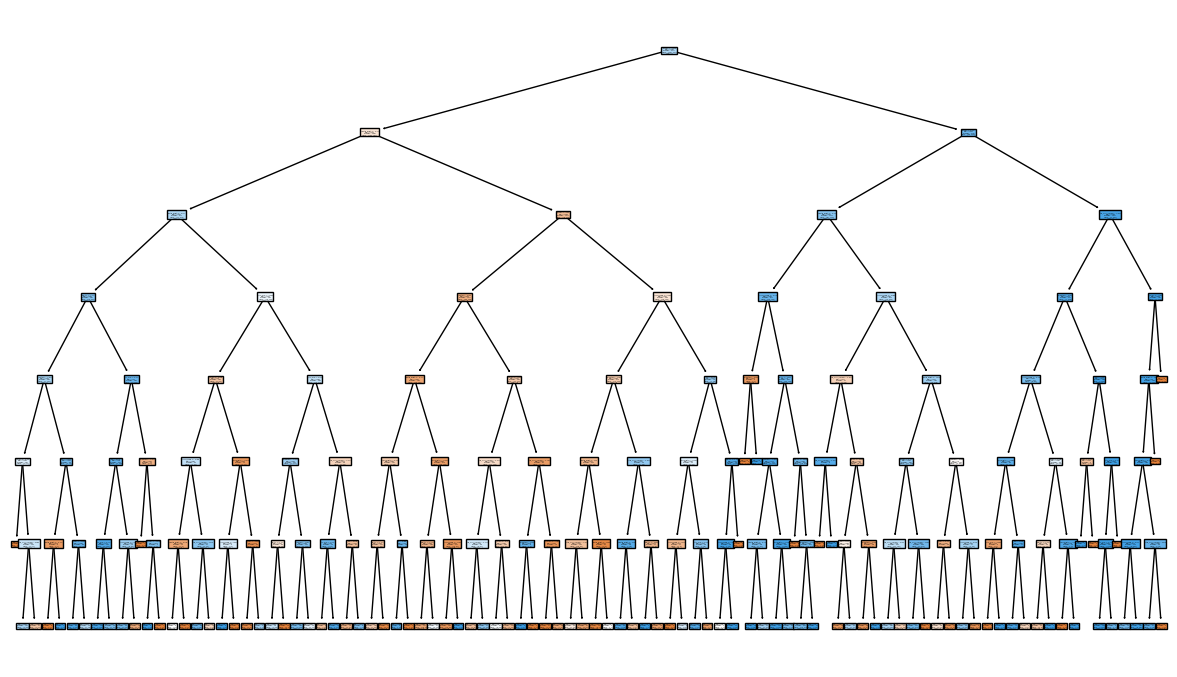

In [138]:
# 최적 모델 트리 그리기
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(GridSearch.best_estimator_['clf'], feature_names=X.columns,
          class_names=['W', 'R'],
          filled=True)
save_fig("plot_tree")  # 그림 저장
plt.show()

In [137]:
import pandas as pd

score_df = pd.DataFrame(GridSearch.cv_results_)
score_df[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']]

,params,rank_test_score,mean_test_score,std_test_score
0,{'clf__max_depth': 2},4,0.730174,0.011245
1,{'clf__max_depth': 4},3,0.732495,0.016039
2,{'clf__max_depth': 7},1,0.744681,0.013232
3,{'clf__max_depth': 10},2,0.741779,0.021250
